Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance - 2 Puntos
Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping - 1 Puntos
Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance - 2 Puntos
Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping - 1 Puntos
Pregunta 5 - Tablero de acciones e ingresos de Tesla - 2 Puntos
Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop - 2 Puntos
Pregunta 7 - Compartir su cuaderno de tareas - 2 Puntos

# Question 1: Use yfinance to Extract Stock Data

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
data_tesla = tesla.history(period="max")
data_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002,69282500,0.0,0.0
2024-11-06 00:00:00-05:00,284.670013,289.589996,275.619995,288.529999,165228700,0.0,0.0
2024-11-07 00:00:00-05:00,288.890015,299.750000,285.519989,296.910004,117309200,0.0,0.0


In [5]:
data_tesla.reset_index(inplace=True)

<Axes: xlabel='Date'>

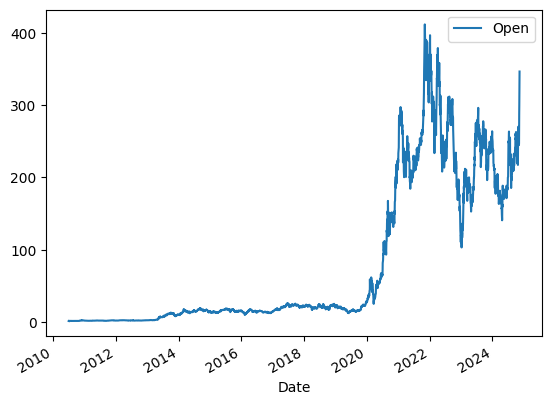

In [6]:
data_tesla.plot(x="Date", y="Open")

# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [10]:
data  = requests.get(url).text

In [12]:
soup = BeautifulSoup(data, 'html.parser')

In [124]:
tesla_data = pd.DataFrame(columns=["Date", "Revenue"])

for tabla in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in tabla.text:
        #print (tabla.find_all("tr"))
        for row in tabla.find("tbody").find_all("tr"):
            col = row.find_all("td")
            fecha = col[0].text
            monto = col[1].text
    
            # Finally we append the data of each row to the table
            tesla_data = pd.concat([tesla_data, pd.DataFrame({"Date":[fecha], "Revenue":[monto]})], ignore_index=True)  

In [125]:
tesla_data

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [128]:
tesla_data["Revenue"] = tesla_data['Revenue'].str.replace(',|\$',"", regex=True)

In [129]:
tesla_data

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [130]:
tesla_data.dropna(inplace=True)

tesla_data = tesla_data[tesla_data['Revenue'] != ""]

In [131]:
tesla_data.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data

In [19]:
gameStop = yf.Ticker("GME")

In [20]:
gme_data = gameStop.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-05 00:00:00-05:00,22.320000,23.200001,22.270000,22.990000,5858400,0.0,0.0
2024-11-06 00:00:00-05:00,23.309999,23.820000,22.900000,23.100000,6648000,0.0,0.0
2024-11-07 00:00:00-05:00,23.070000,23.660000,22.809999,23.450001,5554400,0.0,0.0


In [21]:
gme_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

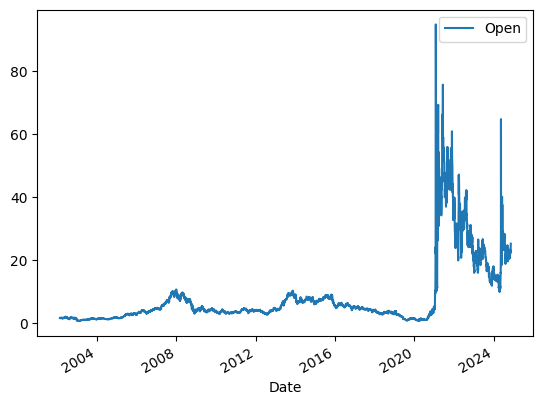

In [22]:
gme_data.plot(x="Date", y="Open")

# Question 4: Use Webscraping to Extract GME Revenue Data

In [76]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [77]:
data_gme  = requests.get(url).text

In [78]:
soup_gme = BeautifulSoup(data_gme, 'html.parser')

In [98]:
df_gme = pd.DataFrame(columns=["Date", "Revenue"])

tablas = soup_gme.find_all("table")
segunda_tabla = tablas[1]

for dato in segunda_tabla.find('tbody').find_all('tr') :
    col = dato.find_all("td")
    fecha = col[0].text
    monto = col[1].text
    
    # Finally we append the data of each row to the table
    df_gme = pd.concat([df_gme, pd.DataFrame({"Date":[fecha], "Revenue":[monto]})], ignore_index=True)  

In [99]:
df_gme

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [113]:
df_gme['Revenue'] = df_gme['Revenue'].replace('[\$,]', '', regex=True).astype(float)

In [114]:
df_gme.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


# Question 5: Plot Tesla Stock Graph

In [133]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data['Date'] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    #fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

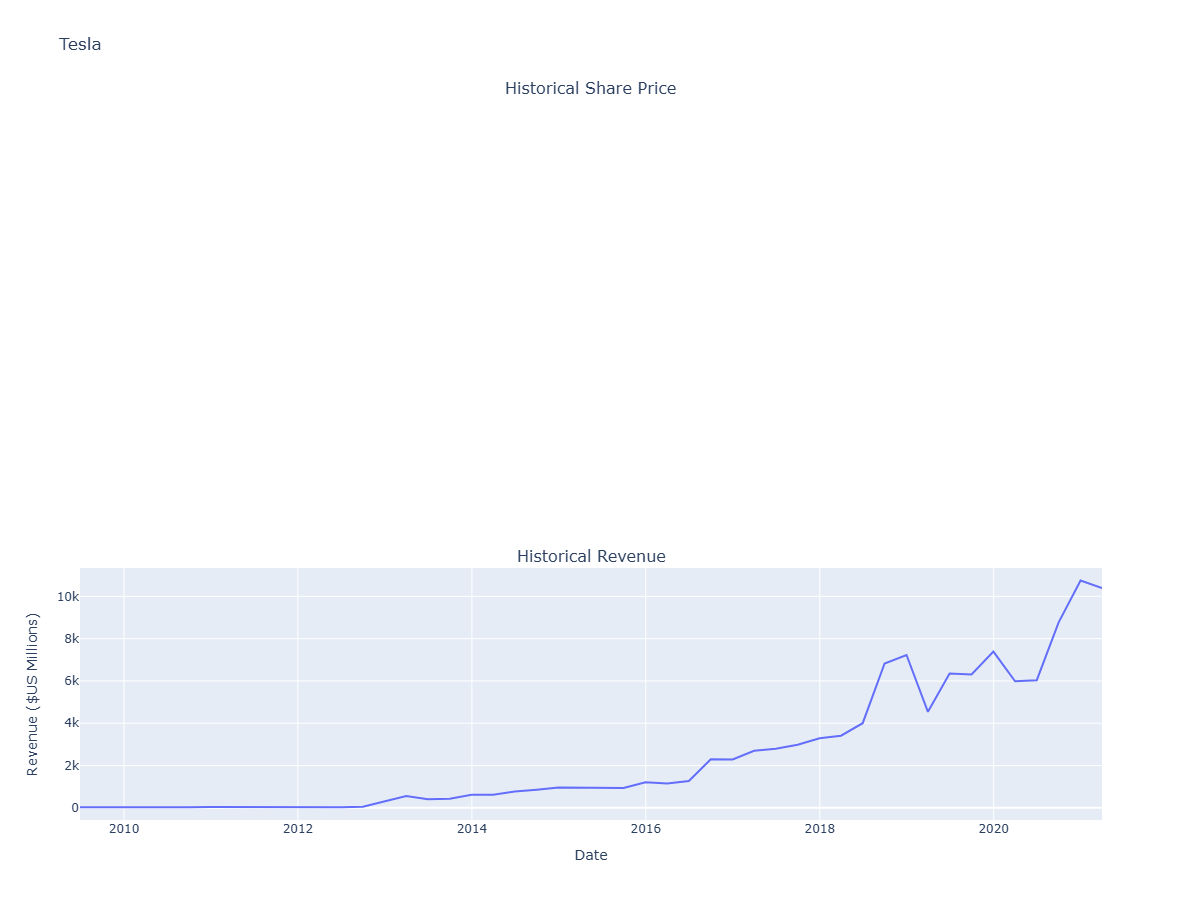

In [134]:
make_graph(tesla_data, tesla_data, 'Tesla')

# Question 6: Plot GameStop Stock Graph

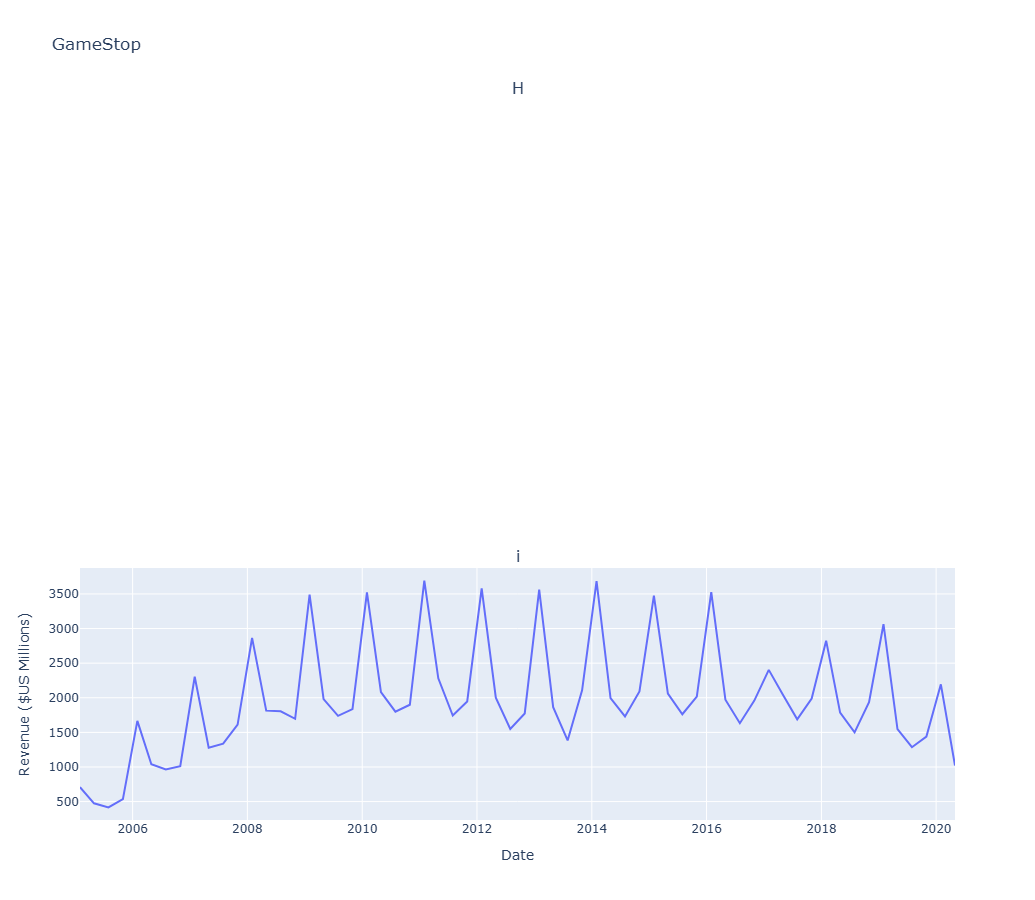

In [118]:
make_graph(df_gme, df_gme, 'GameStop')